# Setup

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as transforms

/home/frauke/anaconda3/envs/super-res/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Read Data

In [3]:
path = '../data'
h5_valid = h5py.File(os.path.join(path, 'valid.h5'), 'r')
h5_pred = h5py.File(os.path.join(path, 'preds.h5'), 'r')
#h5_pred = h5py.File(os.path.join(path, '/home/frauke/super-resolution/nni/nni-experiments/736m14sg/trials/DdOFs/preds.h5'), 'r')

In [4]:
for key in h5_valid.keys():
    print(key)

X
y


In [5]:
lr_valid = h5_valid['X'][:]
hr_valid = h5_valid['y'][:]
hr_pred = h5_pred['y_pred'][:]

In [6]:
print(f'low res shape: {lr_valid.shape}')
print(f'high res shape: {hr_valid.shape}')
print(f'high res pred shape: {hr_pred.shape}')

low res shape: (25, 96, 96, 3)
high res shape: (25, 384, 384, 3)
high res pred shape: (25, 3, 384, 384)


In [7]:
lr_valid[0].shape

(96, 96, 3)

In [8]:
lr_valid[0][0][:5]

array([[244, 243, 238],
       [247, 246, 242],
       [249, 248, 246],
       [250, 248, 246],
       [246, 245, 241]], dtype=uint8)

In [9]:
hr_valid[0].shape

(384, 384, 3)

In [10]:
hr_valid[0][0][:5]

array([[243, 242, 237],
       [244, 243, 238],
       [246, 245, 241],
       [247, 246, 242],
       [248, 247, 243]], dtype=uint8)

In [11]:
hr_pred[0].shape

(3, 384, 384)

In [12]:
idx = np.random.randint(0, 25)
img_lr_valid = Image.fromarray(lr_valid[idx], 'RGB')
print(img_lr_valid.size)
img_hr_valid = Image.fromarray(hr_valid[idx], 'RGB')
print(img_hr_valid.size)
img = np.swapaxes(hr_pred[idx], 0, 2)
print(img.shape)
img = np.swapaxes(img, 0, 1)
print(img.shape)

(96, 96)
(384, 384)
(384, 384, 3)
(384, 384, 3)


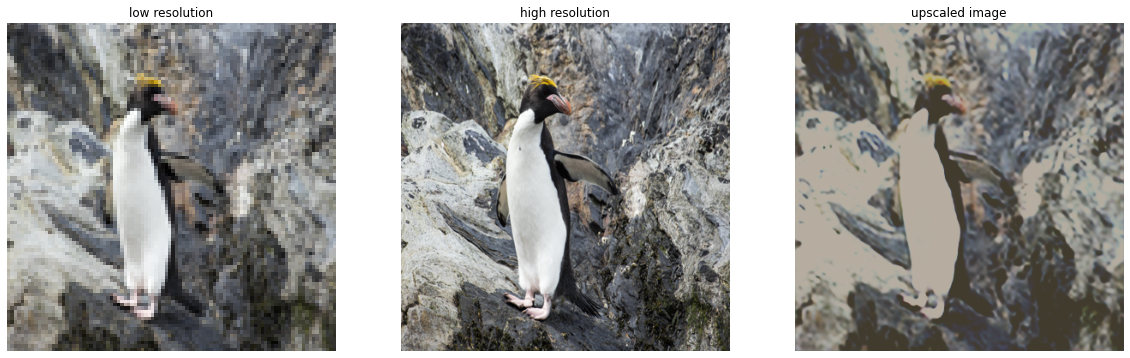

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(img_lr_valid)
axes[0].axis('off')
axes[0].set_title('low resolution')
axes[1].imshow(img_hr_valid)
axes[1].axis('off')
axes[1].set_title('high resolution')
axes[2].imshow(img)
axes[2].axis('off')
axes[2].set_title('upscaled image')
plt.savefig("example_prediction.png")
plt.show()

# Test Normalization

In [14]:
mean = torch.tensor([0.485, 0.456, 0.406])
std = torch.tensor([0.229, 0.224, 0.225])
mean_rev = -(mean/std)
std_rev = 1/std

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))#,
                               ])


un_transform_v = transforms.Compose([transforms.Normalize(mean_rev, std_rev),
                                    transforms.ToPILImage()
                                       ])


un_transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean_rev, std_rev),
                                       ])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([-0.2856, -1.0904, -0.7308, -0.3198, -0.5596])
torch.Size([96, 96, 3])


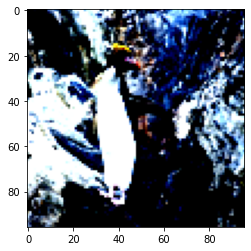

In [15]:
lr_valid_trf = transform(lr_valid[idx])
print(lr_valid_trf[0][0][:5])
img = np.swapaxes(lr_valid_trf, 0, 2)
print(img.shape)
img = np.swapaxes(img, 0, 1)
#lr_valid_trf = Image.fromarray(lr_valid_trf, 'RGB')
plt.imshow(img);

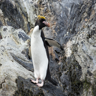

In [16]:
lr_valid_untrf = un_transform_v(lr_valid_trf)
lr_valid_untrf